# Lista 8

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

import sklearn
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split

from mylibs import perceptron
from mylibs import adalineGD
from mylibs import adalineSGD

### 1 - Importando Dataset Prima Indians Diabetes e Escolhendo as 2 Features

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.corrwith(df[8])

0    0.221898
1    0.466581
2    0.065068
3    0.074752
4    0.130548
5    0.292695
6    0.173844
7    0.238356
8    1.000000
dtype: float64

In [4]:
X = df[[1, 5]].values # 2 features com maior correlacao com y
y = df[8].values

### Convertendo dados para array do numpy

In [5]:
X = np.array(X)
X.shape

(768, 2)

### Padronizando dados

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

### Região de decisão

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    plt.legend(loc='upper left')
    plt.show()

### Perceptron

In [8]:
ppn = perceptron.Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train_std, y_train);

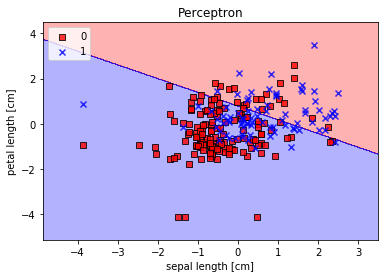

In [9]:
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plot_decision_regions(X_test_std, y_test, classifier=ppn)

plt.show()

### Adaline GD

In [10]:
adaline_b = adalineGD.AdalineGD(n_iter=15, eta=0.01)
adaline_b.fit(X_train_std, y_train);

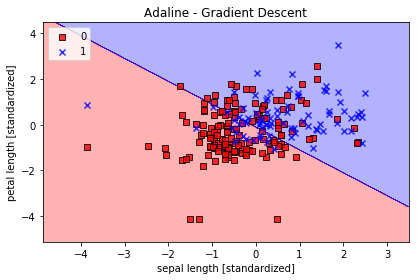

In [11]:
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.tight_layout()
plot_decision_regions(X_test_std, y_test, classifier=adaline_b)
plt.show()

### AdalineSGD

In [12]:
adaline_g = adalineSGD.AdalineSGD(n_iter=15, eta=0.01, random_state=1)
adaline_g.fit(X_train_std, y_train);

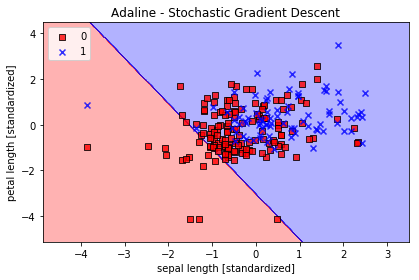

In [13]:
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.tight_layout()
plot_decision_regions(X_test_std, y_test, classifier=adaline_g)

plt.show()

In [14]:
vt_lr_acc = []
vt_knn_acc = []
vt_nb_acc = []
vt_svm_acc = []
vt_adl_acc = []
vt_adgd_acc = []
vt_pct_acc = []

clf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
clf.get_n_splits()

for index_train, index_test in clf.split(X, y):
    X_train_, X_test_ = X[index_train], X[index_test]
    y_train_, y_test_ = y[index_train], y[index_test]
    
    std = StandardScaler().fit(X_train_)
    X_train_std_ = std.transform(X_train_)
    X_test_std_ = std.transform(X_test_)
    
    #Adaline GD
    model_adl = adalineGD.AdalineGD().fit(X_train_std_, y_train_)
    y_pred_adl = model_adl.predict(X_test_std_)
    vt_adl_acc.append(metrics.accuracy_score(y_test_, y_pred_adl))
    
    #Adaline SGD
    model_adgd = adalineSGD.AdalineSGD().fit(X_train_std_, y_train_)
    y_pred_adgd = model_adgd.predict(X_test_std_)
    vt_adgd_acc.append(metrics.accuracy_score(y_test_, y_pred_adgd))
    
    #Perceptron
    model_pct = perceptron.Perceptron().fit(X_train_std_, y_train_)
    y_pred_pct = model_pct.predict(X_test_std_)
    vt_pct_acc.append(metrics.accuracy_score(y_test_, y_pred_pct))
    
    #Logistic Regression
    model_lr = LogisticRegression().fit(X_train_std_, y_train_)
    y_pred_lr = model_lr.predict(X_test_std_)
    vt_lr_acc.append(metrics.accuracy_score(y_test_, y_pred_lr))
    
    #kNN
    model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(X_train_std_, y_train_)
    y_pred_knn = model_knn.predict(X_test_std_)
    vt_knn_acc.append(metrics.accuracy_score(y_test_, y_pred_knn))
    
    #Naive Bayes
    model_nb = GaussianNB().fit(X_train_std_, y_train_)
    y_pred_nb = model_nb.predict(X_test_std_)
    vt_nb_acc.append(metrics.accuracy_score(y_test_, y_pred_nb))
    
    #SVM
    model_svm = SVC().fit(X_train_std_, y_train_)
    y_pred_svm = model_svm.predict(X_test_std_)
    vt_svm_acc.append(metrics.accuracy_score(y_test_, y_pred_svm))

In [15]:
class_names = ['LR', 'kNN','NB','SVM']
class_1 = [vt_lr_acc, vt_knn_acc, vt_nb_acc, vt_svm_acc]

print('Accuracy Adaline GD = {}'.format(np.mean(vt_adl_acc)))
print('Accuracy Adaline SGD = {}'.format(np.mean(vt_adgd_acc)))
print('Accuracy Perceptron = {}'.format(np.mean(vt_pct_acc)))
print('--------------------------------------------------')
print('Accuracy Logistic Regression = {}'.format(np.mean(vt_lr_acc)))
print('Accuracy kNN = {}'.format(np.mean(vt_knn_acc)))
print('Accuracy Naive Bayes = {}'.format(np.mean(vt_nb_acc)))
print('Accuracy SVM = {}'.format(np.mean(vt_svm_acc)))

Accuracy Adaline GD = 0.08330891492459501
Accuracy Adaline SGD = 0.3424361743724727
Accuracy Perceptron = 0.32415083940515244
--------------------------------------------------
Accuracy Logistic Regression = 0.7616856887858905
Accuracy kNN = 0.6901417976399379
Accuracy Naive Bayes = 0.7564671827712927
Accuracy SVM = 0.7564570100900282


## Explique as diferenças entre o Adaline com Gradiente Descendente em Batch e o Adaline com Gradiente Descendente Estocástico.

- Gradiente Descendente em Batch: Minimiza o custo da função, dando um passo na direção oposta a um custo de gradiente que foi calculado a partir de todo conjunto de treino. É, computacionalmente, bastante caro.
- Grandiente Descendente Estocástico: Tipicamente, alcança a convergência mais rapidamente devido a maior frequência nas atualizações dos pesos. Cada gradiente é calculado baseado em um exemplo unico de treino.

- Gradiente descendente em batch (GD) é mais caro e computacionalmente pois calcula os pesos a partir de todas as amostas do conjunto de treino. 
- Enquanto o estocastico (SGD) é calculado apartir de um simples exemplo de treinamento(o que seria cada linha)